In [2]:
import pandas as pd
df2=pd.read_csv("E:\Sem-5\Keylogger\dataset-features-categories.csv")

In [3]:
df2

,transact,API call signature
0,onServiceConnected,API call signature
1,bindService,API call signature
2,attachInterface,API call signature
3,ServiceConnection,API call signature
4,android.os.Binder,API call signature
...,...,...
210,ACCESS_FINE_LOCATION,Manifest Permission
211,SET_WALLPAPER_HINTS,Manifest Permission
212,SET_PREFERRED_APPLICATIONS,Manifest Permission
213,WRITE_SECURE_SETTINGS,Manifest Permission


In [4]:
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.metrics import precision_score,recall_score,f1_score
import tensorflow as tf
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [9]:
classes,count = np.unique(df2,return_counts=True)
#Perform Label Encoding
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)
df2 = df2.replace(classes,lbl_enc.fit_transform(classes))

#Dataset contains special characters like ''?' and 'S'. Set them to NaN and use dropna() to remove them
df2=df2.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(df2.isna().sum())))
df2.dropna(inplace=True)
for c in df2.columns:
    df2[c] = pd.to_numeric(df2[c])
df2

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219] ['/system/app' '/system/bin' 'ACCESS_COARSE_LOCATION'
 'ACCESS_FINE_LOCATION' 'ACCESS_LOCATION_EXTRA_COMMA

,transact,API call signature
0,216,11
1,202,11
2,201,11
3,141,11
4,197,11
...,...,...
210,3,91
211,135,91
212,130,91
213,165,91


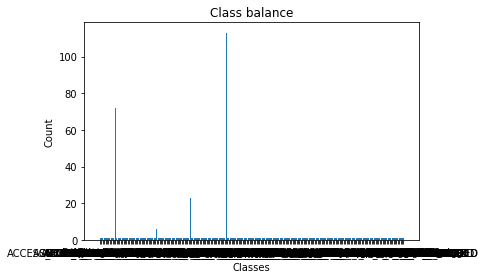

In [10]:
plt.bar(classes,count)
plt.title("Class balance")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [11]:
train_x,test_x,train_y,test_y = train_test_split(df2[df2.columns[:len(df2.columns)-1]].to_numpy(),df2[df2.columns[-1]].to_numpy(),test_size = 0.2,shuffle=True)

In [12]:
print("Train features size : ",len(train_x))
print("Train labels size : ",len(train_y))
print("Test features size : ",len(test_x))
print("Test features size : ",len(test_y))

Train features size :  172
Train labels size :  172
Test features size :  43
Test features size :  43


In [13]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

In [14]:
clf.fit(train_x,train_y)

RandomForestClassifier()

In [15]:
y_pred=clf.predict(test_x)

In [16]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.813953488372093


In [17]:
len(clf.estimators_)

100

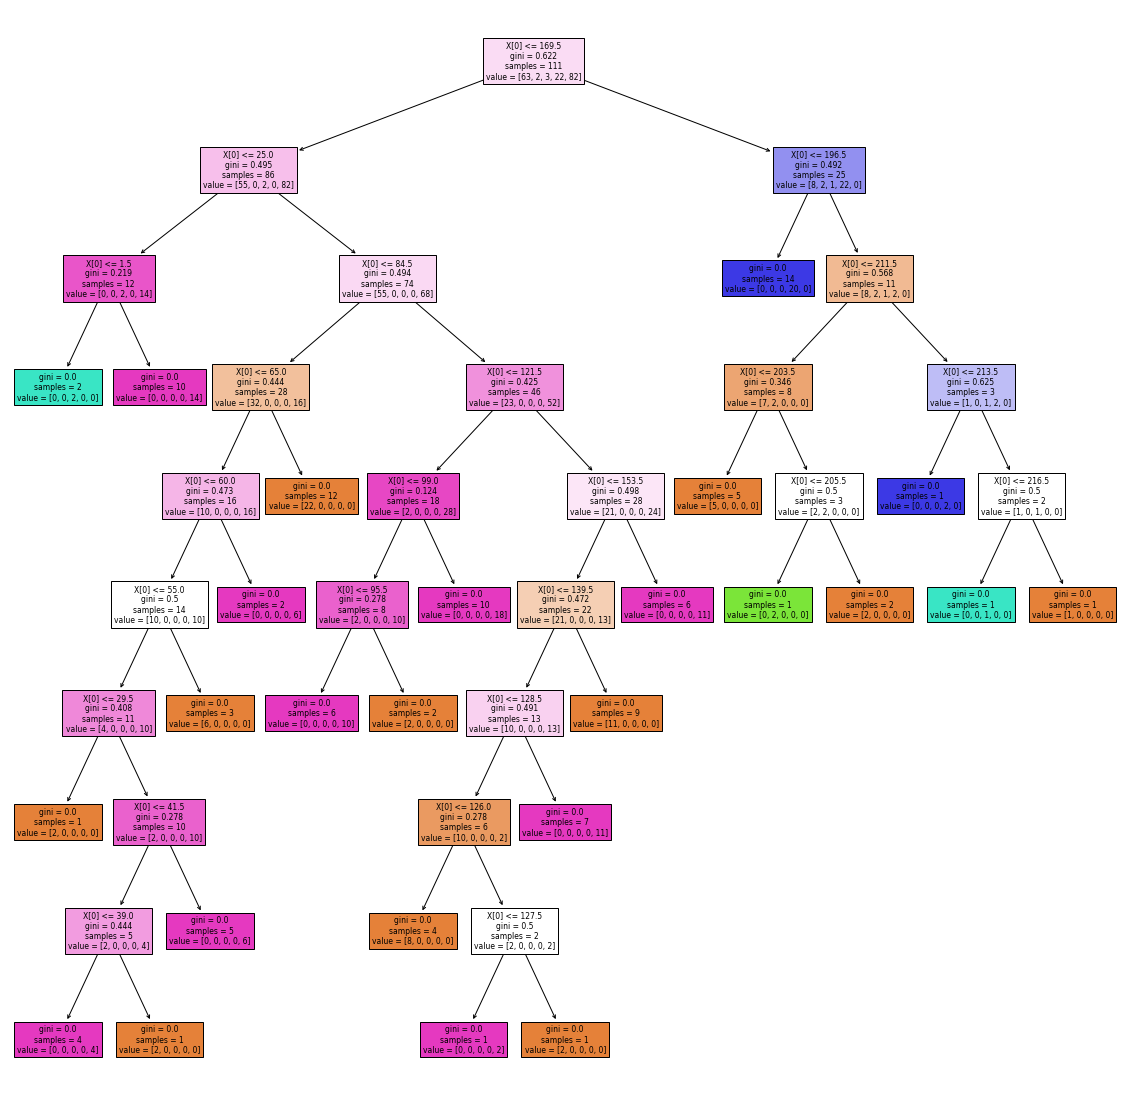

In [18]:
from sklearn import tree
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf.estimators_[0], filled=True)